In [ ]:
# Victor Z
# UW-Madison, 2024
# show convergence of MC approximation
# used GPT to translate Matlab to Python file

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Generate samples of different sizes and compute approximations for different quantities
# note there are discrepancies with Matlab due to use of different samples
np.random.seed(1)
Sv = np.arange(1, 5001, 10)
e = []
v = []
dd = []
prob = []

for S in Sv:
    x = weibull_min.rvs(c=1, scale=2, size=S)
    e.append(np.mean(x))
    v.append(np.mean(np.log(x)))
    dd.append(np.var(x**2+np.exp(-x))) # we do exp(-x) because exp(x) blows up

    loc = x <= 1
    prob.append(np.sum(loc) / S)


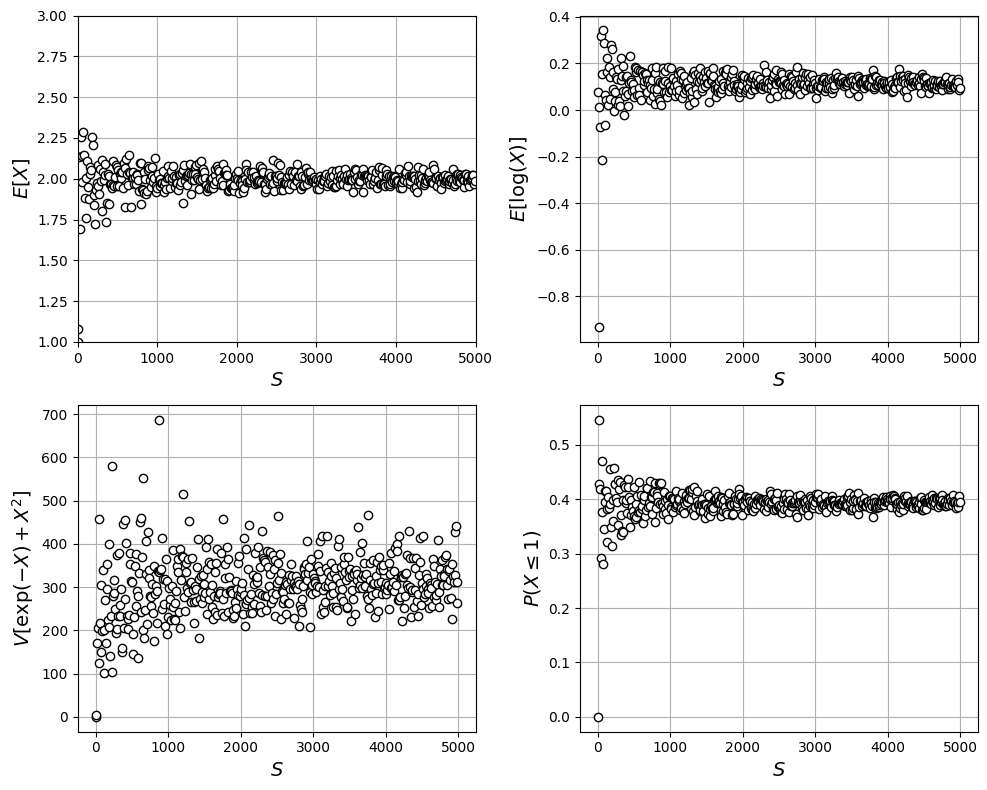

In [6]:
# Plotting results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(Sv, e, 'o', markerfacecolor='w', markeredgecolor='black')
plt.ylabel('$E[X]$', fontsize=14)
plt.xlabel('$S$', fontsize=14)
plt.axis([0, 5000, 1, 3])
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Sv, v, 'o', markerfacecolor='w', markeredgecolor='black')
plt.ylabel('$E[\\log(X)]$', fontsize=14)
plt.xlabel('$S$', fontsize=14)
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Sv, dd, 'o', markerfacecolor='w', markeredgecolor='black')
plt.ylabel('${V}[\\exp(-X) + X^2]$', fontsize=14)
plt.xlabel('$S$', fontsize=14)
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Sv, prob, 'o', markerfacecolor='w', markeredgecolor='black')
plt.ylabel('${P}(X \leq 1)$', fontsize=14)
plt.xlabel('$S$', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()